
# HW3: Problem 3 Classification Comparison with Synthetic Data


* Write a jupyter notebook. 
* It is essential that you include markdown cells explaining what you are doing at each step.

* You are going to compare the classification algorithms you have learned:

1.  Naive Bayes Classification
2.  Logistic Regression
3.  Quadradic Discriminant Analysis
4.  SVM using radial basis functions (RBF)
5.  Decision Tree
6.  KNN with K = 1

So make sure you run each of these algorithms on the data sets you will create to test.

* The goal is to create 4 synthetic data examples with 2D input data, 2 classes, to use to compare the algorithms. 
* You should use a combination of the following 3 synthetic functions to make your examples:
-   [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
-   [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
-   [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

* You may use a combination of the above in the same example. For example, one class could come from a moon and the other class from a circle in the same example. You could also make one class is a combination of a moon bending oneway and a moon bending the other if that worked better for your example.
* Your examples should be such that:

1.  One of the four examples will be two well-separated blob classes. This example show that all the classifiers work pretty well (near-perfect or perfect classification)
2.  In the two of the data examples, the linear classifier (logistic regression) should do more poorly (both in training and test evaluation) than the others
3.  In the second example the quadratic should do very well (both in training and testing) but the linear classifier should do poorly. The SVM, Decision Tree, and KNN should also do better than the Logistic Regressioon
4.  In the third example you should be able to construct an example where the decision tree and KNN both overfit so the training error is small but the testing error is large, and linear regression does better
5.  The fourth example should be such that SVM and KNN do better than the others (in testing error)

In your evaluations, you should always split the data set into a training and test set using [sklearn.model_selection.train_test_split ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) and also create a report using [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

There should be both an evaluation for training which means fit on training test on training (evaluation of fit) and testing which means fit on training but test on the testing data with the training fit!
Never, ever, fit on training data!!!

Since you are working with 2D data you should also create a set of visualized comparisons like those here:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">Classifier comparison</span>
<span style="margin-top: 0.5em; display: block;">A comparison of a
several classifiers in scikit-learn on synthetic datasets. The point of
this example is to illustrate the nature of decision boundaries of
different classifiers. This should be ta...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>

You can use these visualizations and comparisons as inspiration but you should develop your own. Don\'t forget to see your random numbers! For some more idea on how to generate the synthetic data please read these examples too:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">2.3. Clustering</span> <span
style="margin-top: 0.5em; display: block;">Clustering of unlabeled data
can be performed with the module sklearn.cluster. Each clustering
algorithm comes in two variants: a class, that implements the fit method
to learn the clusters on trai...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>


# Solution key:
#### libraries:
Let's import all the libraries we need.

In [89]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Example 1: Two well-separated blob classes
In this example, we will create two well-separated blob classes using make_blobs. This example will show that all the classifiers work pretty well.

In [90]:
# Creating the dataset
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

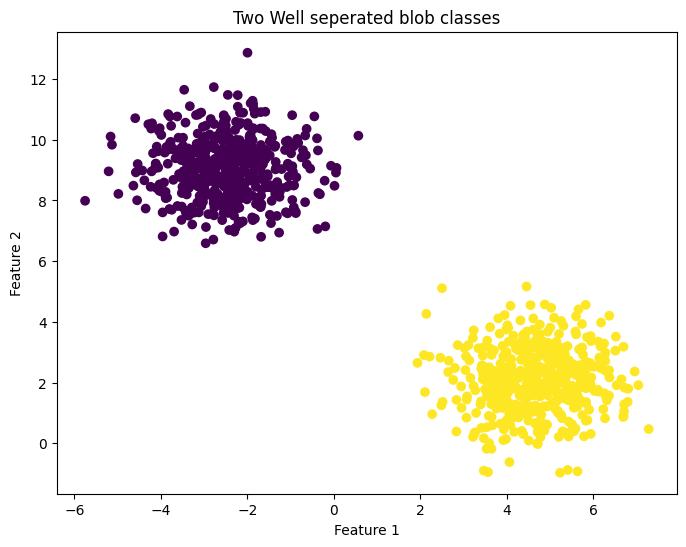

In [91]:
# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Two Well seperated blob classes")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

After visualizing the dataset we can see it's perfactly we separeted.

Now, Using sklearn.model_selection.train_test_split to split the dataset. And then We will fit the models with training set.

In [92]:
# Spliting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Fiting the models on the training data
lr = LogisticRegression(random_state=42).fit(X_train, y_train)
svm = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)

Now we will use  sklearn.metrics.classification_report to make a classification report. First we are doing on training set and then wi will do on test set to see how well are models performing.

In [94]:
# Evaluating the models on the training data
print("Training evaluation:")
print("Logistic Regression:")
print(classification_report(y_train, lr.predict(X_train)))
print("SVM:")
print(classification_report(y_train, svm.predict(X_train)))
print("Decision Tree:")
print(classification_report(y_train, tree.predict(X_train)))
print("KNN:")
print(classification_report(y_train, knn.predict(X_train)))
print("QDA:")
print(classification_report(y_train, qda.predict(X_train)))
print("GaussianNB:")
print(classification_report(y_train, gnb.predict(X_train)))

Training evaluation:
Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       403

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       403

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       403

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg

In [95]:
# Evaluating the models on the test data
print("Testing evaluation:")
print("Logistic Regression:")
print(classification_report(y_test, lr.predict(X_test)))
print("SVM:")
print(classification_report(y_test, svm.predict(X_test)))
print("Decision Tree:")
print(classification_report(y_test, tree.predict(X_test)))
print("KNN:")
print(classification_report(y_test, knn.predict(X_test)))

print(classification_report(y_test, knn.predict(X_test)))
print("QDA:")
print(classification_report(y_test, qda.predict(X_test)))
print("GaussianNB:")
print(classification_report(y_test, gnb.predict(X_test)))

Testing evaluation:
Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        97

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        97

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        97

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg 

Both Classification report are showing how well all models are doing for this dataset.

Since we are working with 2D data we should also create a set of visualized comparisons of classifiactios. For that we are going to plot decision boundary for classifier. To plot it we are going to make a funtion which wil take the classifier, X and y variables as parameters. Then it will define the step size of the mesh and  will create a mesh of values for the x and y axes. Then, it will use the classifier to classify the points in the mesh and store it in the Z variable. The x and y axes are limited with the min and max values of the mesh.              

In [96]:
def plot_decision_boundary(clf, X, y):
    h = 0.02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

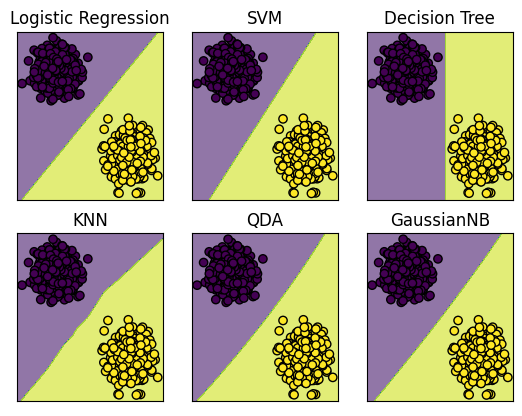

In [97]:
# Ploting decision boundary of logistic regression
plt.subplot(231)
plot_decision_boundary(lr, X_train, y_train)
plt.title("Logistic Regression")

# Ploting decision boundary of SVM
plt.subplot(232)
plot_decision_boundary(svm, X_train, y_train)
plt.title("SVM")

# Ploting decision boundary of decision tree
plt.subplot(233)
plot_decision_boundary(tree, X_train, y_train)
plt.title("Decision Tree")

# Ploting decision boundary of KNN
plt.subplot(234)
plot_decision_boundary(knn, X_train, y_train)
plt.title("KNN")

# Ploting decision boundary of QDA
plt.subplot(235)
plot_decision_boundary(qda, X_train, y_train)
plt.title("QDA")

# Ploting decision boundary of GaussianNB
plt.subplot(236)
plot_decision_boundary(gnb, X_train, y_train)
plt.title("GaussianNB")

plt.show()


## Example 2: The Circle & Bolb
In this example, we will create two classes using make_circles and make_blobs.that are not easily separable by a linear classifier. This dataset has a complex nonlinear boundary that is difficult to model with a simple linear model like linear regression. The decision tree and KNN models can easily overfit this dataset and obtain a small training error, but a large testing error. On the other hand, linear regression is less prone to overfitting and can obtain a smaller testing error.

In [144]:
# Generate the dataset
X1, y1 = make_blobs(n_samples=500, centers=2, n_features=2, random_state=1)
X2, y2 = make_circles(n_samples=500, noise=0.5, factor=0.5, random_state=2)
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Spliting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

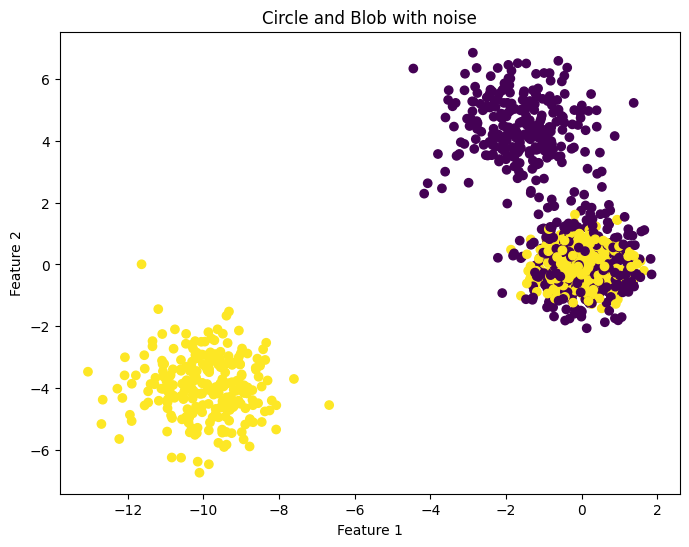

In [150]:
# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Circle and Blob with noise")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [146]:
# Fiting the models on the training data
lr = LogisticRegression(random_state=42).fit(X_train, y_train)
svm = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)

In [147]:
# Evaluating the models on the training data
print("Training evaluation:")
print("Logistic Regression:")
print(classification_report(y_train, lr.predict(X_train)))
print("SVM:")
print(classification_report(y_train, svm.predict(X_train)))
print("Decision Tree:")
print(classification_report(y_train, tree.predict(X_train)))
print("KNN:")
print(classification_report(y_train, knn.predict(X_train)))
print("QDA:")
print(classification_report(y_train, qda.predict(X_train)))
print("GaussianNB:")
print(classification_report(y_train, gnb.predict(X_train)))

Training evaluation:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       394
           1       0.75      0.73      0.74       406

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

SVM:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       394
           1       0.73      0.95      0.82       406

    accuracy                           0.79       800
   macro avg       0.83      0.79      0.79       800
weighted avg       0.82      0.79      0.79       800

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       406

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg

In [148]:
# Evaluating the models on the test data
print("Testing evaluation:")
print("Logistic Regression:")
print(classification_report(y_test, lr.predict(X_test)))
print("SVM:")
print(classification_report(y_test, svm.predict(X_test)))
print("Decision Tree:")
print(classification_report(y_test, tree.predict(X_test)))
print("KNN:")
print(classification_report(y_test, knn.predict(X_test)))

print(classification_report(y_test, knn.predict(X_test)))
print("QDA:")
print(classification_report(y_test, qda.predict(X_test)))
print("GaussianNB:")
print(classification_report(y_test, gnb.predict(X_test)))

Testing evaluation:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       106
           1       0.71      0.80      0.75        94

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200

SVM:
              precision    recall  f1-score   support

           0       0.95      0.56      0.70       106
           1       0.66      0.97      0.78        94

    accuracy                           0.75       200
   macro avg       0.81      0.76      0.74       200
weighted avg       0.81      0.75      0.74       200

Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       106
           1       0.69      0.82      0.75        94

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg 

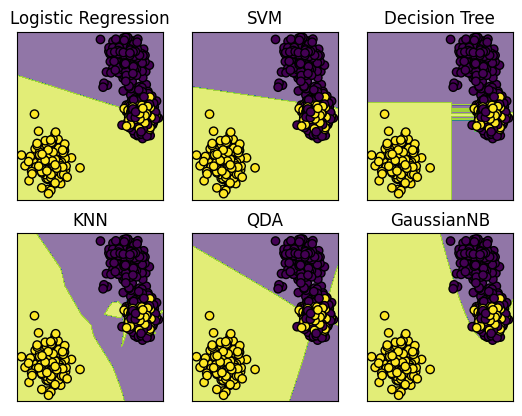

In [149]:
# Ploting decision boundary of logistic regression
plt.subplot(231)
plot_decision_boundary(lr, X_train, y_train)
plt.title("Logistic Regression")

# Ploting decision boundary of SVM
plt.subplot(232)
plot_decision_boundary(svm, X_train, y_train)
plt.title("SVM")

# Ploting decision boundary of decision tree
plt.subplot(233)
plot_decision_boundary(tree, X_train, y_train)
plt.title("Decision Tree")

# Ploting decision boundary of KNN
plt.subplot(234)
plot_decision_boundary(knn, X_train, y_train)
plt.title("KNN")

# Ploting decision boundary of QDA
plt.subplot(235)
plot_decision_boundary(qda, X_train, y_train)
plt.title("QDA")

# Ploting decision boundary of GaussianNB
plt.subplot(236)
plot_decision_boundary(gnb, X_train, y_train)
plt.title("GaussianNB")

plt.show()

## Example 3: Two moons bending in opposite directions

In this example, we create two classes from two moons bending in opposite directions using make_moons. We then plot them using a scatter plot. Since the classes are not linearly separable, the linear classifier (logistic regression) should do poorly.

In [104]:
# Generating data
X_moon1, y_moon1 = make_moons(n_samples=500, noise=0.1, random_state=42)
X_moon2, y_moon2 = make_moons(n_samples=500, noise=0.1, random_state=43)

# Shifting and rotating moon2
X_moon2[:, 0] = X_moon2[:, 0] + 2
X_moon2 = np.dot(X_moon2, np.array([[1, -1], [1, 1]]))

# Combining data
X = np.vstack((X_moon1, X_moon2))
y = np.concatenate((y_moon1, y_moon2))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

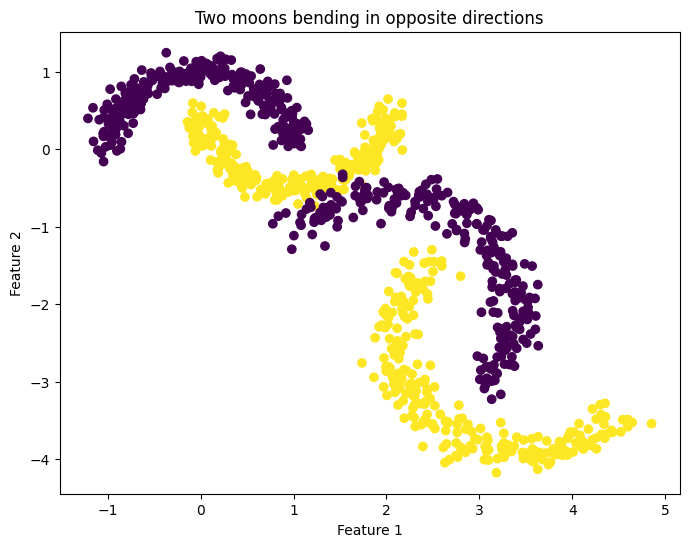

In [105]:
# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Two moons bending in opposite directions")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [106]:
# Fiting the models on the training data
lr = LogisticRegression(random_state=42).fit(X_train, y_train)
svm = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)

In [107]:
# Evaluating the models on the training data
print("Training evaluation:")
print("Logistic Regression:")
print(classification_report(y_train, lr.predict(X_train)))
print("SVM:")
print(classification_report(y_train, svm.predict(X_train)))
print("Decision Tree:")
print(classification_report(y_train, tree.predict(X_train)))
print("KNN:")
print(classification_report(y_train, knn.predict(X_train)))
print("QDA:")
print(classification_report(y_train, qda.predict(X_train)))
print("GaussianNB:")
print(classification_report(y_train, gnb.predict(X_train)))

Training evaluation:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       406
           1       0.70      0.55      0.61       394

    accuracy                           0.66       800
   macro avg       0.67      0.66      0.66       800
weighted avg       0.67      0.66      0.66       800

SVM:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       406
           1       0.76      0.47      0.58       394

    accuracy                           0.67       800
   macro avg       0.69      0.66      0.65       800
weighted avg       0.69      0.67      0.65       800

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       394

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg

In [108]:
# Evaluating the models on the test data
print("Testing evaluation:")
print("Logistic Regression:")
print(classification_report(y_test, lr.predict(X_test)))
print("SVM:")
print(classification_report(y_test, svm.predict(X_test)))
print("Decision Tree:")
print(classification_report(y_test, tree.predict(X_test)))
print("KNN:")
print(classification_report(y_test, knn.predict(X_test)))
print("QDA:")
print(classification_report(y_test, qda.predict(X_test)))
print("GaussianNB:")
print(classification_report(y_test, gnb.predict(X_test)))

Testing evaluation:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.59      0.71      0.65        94
           1       0.69      0.57      0.62       106

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.63       200
weighted avg       0.64      0.64      0.63       200

SVM:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71        94
           1       0.80      0.49      0.61       106

    accuracy                           0.67       200
   macro avg       0.70      0.68      0.66       200
weighted avg       0.71      0.67      0.65       200

Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        94
           1       0.96      0.96      0.96       106

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg 

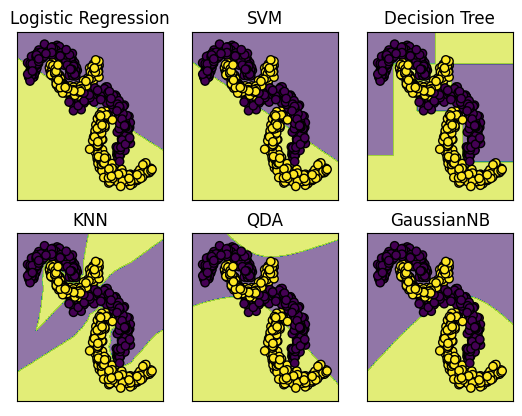

In [109]:
# Ploting decision boundary of logistic regression
plt.subplot(231)
plot_decision_boundary(lr, X_train, y_train)
plt.title("Logistic Regression")

# Ploting decision boundary of SVM
plt.subplot(232)
plot_decision_boundary(svm, X_train, y_train)
plt.title("SVM")

# Ploting decision boundary of decision tree
plt.subplot(233)
plot_decision_boundary(tree, X_train, y_train)
plt.title("Decision Tree")

# Ploting decision boundary of KNN
plt.subplot(234)
plot_decision_boundary(knn, X_train, y_train)
plt.title("KNN")

# Ploting decision boundary of QDA
plt.subplot(235)
plot_decision_boundary(qda, X_train, y_train)
plt.title("QDA")

# Ploting decision boundary of GaussianNB
plt.subplot(236)
plot_decision_boundary(gnb, X_train, y_train)
plt.title("GaussianNB")

plt.show()

## Example 4: Moons and Circles

In this example, we generate two classes using a combination of make_moons and make_circles functions from sklearn.datasets. The goal of this example is to show that the linear classifier (logistic regression) performs poorly on this type of data.

In [110]:
# Generating moons and circles classes
X_moons, y_moons = make_moons(n_samples=500, noise=0.15, random_state=42)
X_circles, y_circles = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

#Combing dataset
X = np.vstack([X_moons, X_circles])
y = np.hstack([y_moons, y_circles])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

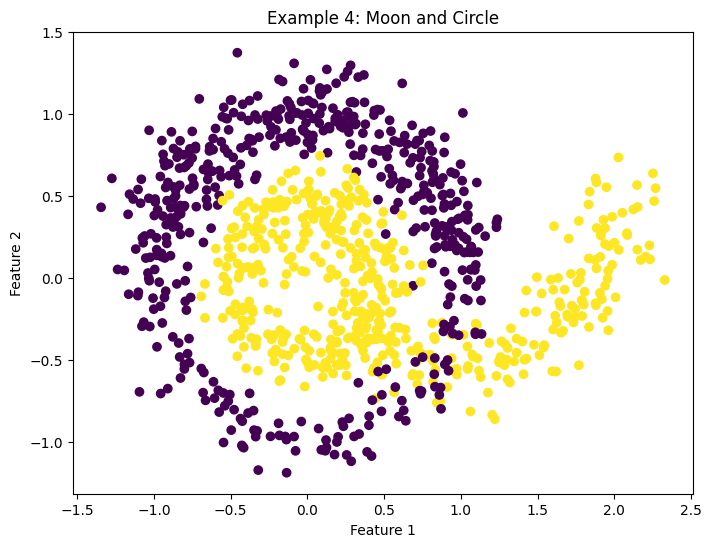

In [111]:
# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Example 4: Moon and Circle')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [112]:
# Fit the models on the training data
lr = LogisticRegression(random_state=42).fit(X_train, y_train)
svm = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)

In [113]:
# Evaluate the models on the training data
print("Training evaluation:")
print("Logistic Regression:")
print(classification_report(y_train, lr.predict(X_train)))
print("SVM:")
print(classification_report(y_train, svm.predict(X_train)))
print("Decision Tree:")
print(classification_report(y_train, tree.predict(X_train)))
print("KNN:")
print(classification_report(y_train, knn.predict(X_train)))
print("QDA:")
print(classification_report(y_train, qda.predict(X_train)))
print("GaussianNB:")
print(classification_report(y_train, gnb.predict(X_train)))

Training evaluation:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       408
           1       0.66      0.65      0.66       392

    accuracy                           0.67       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.67      0.67      0.67       800

SVM:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       408
           1       0.67      0.72      0.69       392

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       392

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg

In [114]:
# Evaluate the models on the test data
print("Testing evaluation:")
print("Logistic Regression:")
print(classification_report(y_test, lr.predict(X_test)))
print("SVM:")
print(classification_report(y_test, svm.predict(X_test)))
print("Decision Tree:")
print(classification_report(y_test, tree.predict(X_test)))
print("KNN:")
print(classification_report(y_test, knn.predict(X_test)))

print(classification_report(y_test, knn.predict(X_test)))
print("QDA:")
print(classification_report(y_test, qda.predict(X_test)))
print("GaussianNB:")
print(classification_report(y_test, gnb.predict(X_test)))

Testing evaluation:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65        92
           1       0.70      0.67      0.68       108

    accuracy                           0.67       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.67      0.67      0.67       200

SVM:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        92
           1       0.70      0.73      0.71       108

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.69      0.68       200

Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        92
           1       0.93      0.89      0.91       108

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg 

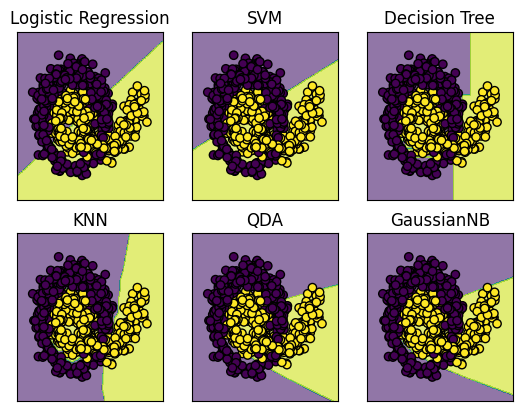

In [115]:
# Ploting decision boundary of logistic regression
plt.subplot(231)
plot_decision_boundary(lr, X_train, y_train)
plt.title("Logistic Regression")

# Ploting decision boundary of SVM
plt.subplot(232)
plot_decision_boundary(svm, X_train, y_train)
plt.title("SVM")

# Ploting decision boundary of decision tree
plt.subplot(233)
plot_decision_boundary(tree, X_train, y_train)
plt.title("Decision Tree")

# Ploting decision boundary of KNN
plt.subplot(234)
plot_decision_boundary(knn, X_train, y_train)
plt.title("KNN")

# Ploting decision boundary of QDA
plt.subplot(235)
plot_decision_boundary(qda, X_train, y_train)
plt.title("QDA")

# Ploting decision boundary of GaussianNB
plt.subplot(236)
plot_decision_boundary(gnb, X_train, y_train)
plt.title("GaussianNB")

plt.show()